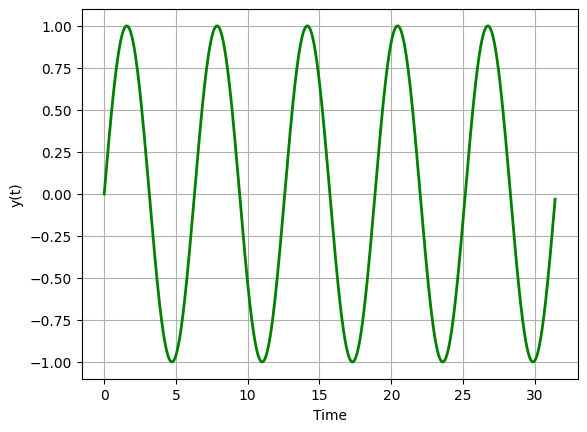

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def force(t, x, v):
    """
    가속도 정의. 모듈의 이름은 force이지만, 사실은 가속도
    """
    return -x

def velocity(t, x, v):
    """
    속도는 단순한 속도
    """
    return v

def rungekutta_method(x0, v0, t0, t1, N):
    """
    x0 : 초기 위치
    v0 : 초기 속도
    t0 : 초기 시각
    t1 : 최종 시각
    N : t0-t1 구간을 N 조각으로 불연속화
    """
    xs, vs, ts= [x0], [v0], np.linspace(t0, t1, N)
    
    h = (t1 - t0) / N

    for i in range(1, N):
        t = t0 + h*(i-1)
        
        """
        룽게-쿠타 법칙에 따라서 k1, k2, k3, k4를 x, v에 대해서 계산
        위치(x)와 속도(v)를 동시에 계산
        """
        k1x = velocity(t, x0, v0)
        k1v = force(t, x0, v0)

        k2x = velocity(t+h/2, x0+h*k1x/2, v0+h*k1v/2)
        k2v = force(t+h/2, x0+h*k1x/2, v0+h*k1v/2)

        k3x = velocity(t+h/2, x0+h*k2x/2, v0+h*k2v/2)
        k3v = force(t+h/2, x0+h*k2x/2, v0+h*k2v/2)

        k4x = velocity(t+h, x0+h*k3x, v0+h*k3v)
        k4v = force(t+h, x0+h*k3x, v0+h*k3v)

        """
        룽게-쿠타 법칙에 따라서 x, v 를 업데이트
        """
        x1 = x0 + h*(k1x + 2*k2x + 2*k3x + k4x)/6
        v1 = v0 + h*(k1v + 2*k2v + 2*k3v + k4v)/6

        xs.append(x1)
        vs.append(v1)

        x0 = x1
        v0 = v1

    return ts, xs, vs


def harmonic_oscillator():
    """
    계산할 조건 입력
    """
    t0, t1 = 0, 5*(2*np.pi)
    x0, v0 = 0, 1
    N = 1000

    """
    룽게-쿠타 방법을 이용하여 미분 방정식 계산
    """
    T, X, V = rungekutta_method(x0, v0, t0, t1, N)

    """
    matplotlib 라이브러리를 이용하여 (t, x) 그래프를 생성
    """
    plt.plot(T, X, lw = 2, color = "green", label = "Runge-Kutta")
    plt.xlabel("Time")
    plt.ylabel("y(t)")
    plt.grid()
    plt.show()
    plt.close('all')

if __name__ == '__main__':
    harmonic_oscillator()